# Un modèle de deep learning

In [1]:
import tensorflow

In [2]:
data = tensorflow.keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = data.load_data()

In [4]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

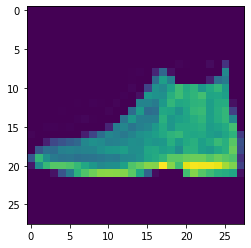

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])

In [6]:
x_test[0].shape

(28, 28)

In [7]:
# construction du modèle
model_fashion = tensorflow.keras.Sequential()
model_fashion.add(tensorflow.keras.layers.Flatten(input_shape=(28,28)))
model_fashion.add(tensorflow.keras.layers.Dense(32, activation = "relu"))
model_fashion.add(tensorflow.keras.layers.Dense(10, activation = "softmax"))

In [8]:
model_fashion.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_fashion.compile(optimizer='adam',loss='CategoricalCrossentropy', metrics='accuracy')

In [10]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
history = model_fashion.fit(x_train, y_train, batch_size= 128 , epochs= 30, validation_data= (x_test,y_test))

Epoch 1/30
469/469 [==============================] - 1s 2ms/step - loss: 4.8021 - accuracy: 0.5035 - val_loss: 1.4179 - val_accuracy: 0.5501
Epoch 2/30
469/469 [==============================] - 1s 2ms/step - loss: 1.2567 - accuracy: 0.5713 - val_loss: 1.2690 - val_accuracy: 0.5893
Epoch 3/30
469/469 [==============================] - 1s 2ms/step - loss: 1.0656 - accuracy: 0.6231 - val_loss: 1.0243 - val_accuracy: 0.6290
Epoch 4/30
469/469 [==============================] - 1s 2ms/step - loss: 0.9226 - accuracy: 0.6603 - val_loss: 0.9704 - val_accuracy: 0.6645
Epoch 5/30
469/469 [==============================] - 1s 2ms/step - loss: 0.8182 - accuracy: 0.6919 - val_loss: 0.8254 - val_accuracy: 0.6978
Epoch 6/30
469/469 [==============================] - 1s 2ms/step - loss: 0.7533 - accuracy: 0.7082 - val_loss: 0.7884 - val_accuracy: 0.7090
Epoch 7/30
469/469 [==============================] - 1s 2ms/step - loss: 0.7171 - accuracy: 0.7172 - val_loss: 0.7565 - val_accuracy: 0.7068
Epoch 

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

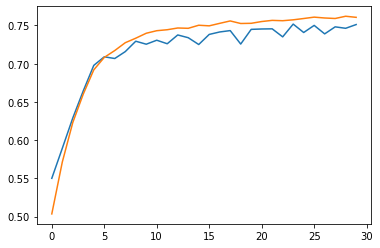

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1])

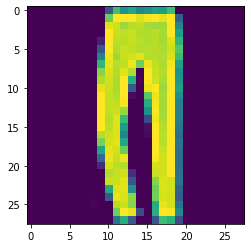

In [14]:
plt.imshow(x_test[2])
model_fashion.predict_classes(x_test[2].reshape(-1,28,28))

# Test de numba

In [15]:
from numba import jit
import random

@jit(nopython=True)
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

In [18]:
def monte_carlo_pi2(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

In [16]:
%timeit monte_carlo_pi(1000)

16.3 µs ± 4.32 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%timeit monte_carlo_pi2(1000)

431 µs ± 4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
